# Loading libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("dataset_cleaning1.csv")

In [5]:
df.columns

Index(['Age Group', 'Sexual Orientation', 'Race', 'Living Situation',
       'Household Composition', 'Religious Preference', 'Veteran Status',
       'Employment Status', 'Number Of Hours Worked Each Week',
       'Education Status', 'Mental Illness', 'Intellectual Disability',
       'Autism Spectrum', 'Other Developmental Disability',
       'Alcohol Related Disorder', 'Drug Substance Disorder',
       'Opioid Related Disorder', 'Mobility Impairment Disorder',
       'Hearing Impairment', 'Visual Impairment', 'Speech Impairment',
       'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity',
       'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
       'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
       'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Serious Mental Illness',
     

# Preparing the data for machine learning model

### Handling the UNKNOWN values in the target column

In this part of the project the defined target will be the column 'substance related disorder' that combine the information from three other columns : 'Alcohol Related Disorder', 'Drug Substance Disorder', 'Opioid Related Disorder'. In this part of the project it is better to not have "UNKNOWN' values in the target column. So I decided to drop the rows where 'substance related disorder' == 'UNKNOWN'

In [6]:
# Keep the rows with no UNKNOWN attribute in 'susbatnce related disorder'
data = df[df["substance related disorder"] != "UNKNOWN"]
print('before dropping the rows:', df.shape)
print('after dropping the rows:', data.shape)

before dropping the rows: (206612, 53)
after dropping the rows: (198801, 53)


### Dropping the columns taht can affect the modelisation

The target column "substance related disorder" was engineered based on three columns 'Alcohol Related Disorder', 'Drug Substance Disorder' and 'Opioid Related Disorder'. So these 3 columns hsould be dropped from the dataset applied to the model. 'Principal Diagnosis Class', 'Additional Diagnosis Class' these two columns also contain information about substance disorders so they also should be dropped

In [7]:
# Define colmuns to drop and apply drop function
col_drop = ['Alcohol Related Disorder', 'Drug Substance Disorder', 'Opioid Related Disorder', 'Principal Diagnosis Class', 'Additional Diagnosis Class']
data = data.drop(col_drop, axis = 1)

In [8]:
data.shape

(198801, 48)

### Encoding the data for machine learning

#### Start by splitting the target column from the other features

In [10]:
# Splitting the X and y data

def split_X_y(df, target_col):
    # Split dataframe into X and y
    X = df.drop(target_col, axis=1) 
    y = df[target_col]

    return X, y

X, y = split_X_y(data, "substance related disorder")

#### Encoding the features X

In [11]:
X_encod = pd.get_dummies(X, drop_first = True)

In [12]:
X_encod.shape

(198801, 106)

In [13]:
X_encod.head()

,Age Group_CHILD,Sexual Orientation_STRAIGHT,Sexual Orientation_UNKNOWN,Race_MULTI-RACIAL,Race_OTHER,Race_UNKNOWN RACE,Race_WHITE ONLY,Living Situation_INSTITUTIONAL SETTING,Living Situation_OTHER LIVING SITUATION,Living Situation_PRIVATE RESIDENCE,...,Financial aid or insurance_YES,Gender_MALE,Gender_NON-BINARY,Gender_TRANSGENDER FEMALE,Gender_TRANSGENDER MALE,Gender_UNKNOWN,Smoke(d)_UNKNOWN,Smoke(d)_YES,Cannabis use_UNKNOWN,Cannabis use_YES
0,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0


#### Replace the 'YES', 'NO' into 0 and 1
Knowing that there is no unknown left in the target column I can ony use 0 and 1

In [14]:
y_encod = y.replace({'NO': 0, 'YES': 1})

#### Replace the 'YES', 'NO' into 0 and 1
Cocatenate the X and y in the same table

In [15]:
data_encod = pd.concat([X_encod, y_encod], axis=1)

In [16]:
data_encod.shape

(198801, 107)

### Evaluating the balance between 'Yes' and 'No' attributes in target column

In [17]:
category_No = data_encod[data_encod["substance related disorder"] == 0]
category_Yes = data_encod[data_encod["substance related disorder"] == 1]
print(category_No.shape)
print('')
print(category_Yes.shape)

(163185, 107)

(35616, 107)


We can see that there is an imbalance between the 'YES' and 'NO' attributes in this dataset. We need to handle the imbalance. We will fo this after splitting the data in order to protect the test data from leakage

# Splitting test and train

In [20]:
# Split the dataframe bewteen train and test before upsampling on the train

def split_data(data, test_size=0.2, random_state=42):

    data_train, data_test = train_test_split(data, test_size=test_size, random_state=random_state)
    
    return data_train, data_test

data_train, data_test = split_data(data_encod)

In [21]:
# Check the inbalance in the train data
category_0 = data_train[data_train["substance related disorder"] == 0]
category_1 = data_train[data_train["substance related disorder"] == 1]

print(category_0.shape)
print('')
print(category_1.shape)

(130614, 107)

(28426, 107)


In [22]:
# Check the inbalance in the test data
test_0 = data_test[data_test["substance related disorder"] == 0]
test_1 = data_test[data_test["substance related disorder"] == 1]

print(test_0.shape)
print('')
print(test_1.shape)

(32571, 107)

(7190, 107)


# Downsampling on the train data

In [23]:
# downsample the majority class to the size of the positive class using pandas sample method
c1_len = 28426
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(28426, 107)
(28426, 107)


In [24]:
# Regroup the data together category_0_down and category_1
data_train_down = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
data_train_down = data_train_down .sample(frac=1)
print('shape after downsampling and concatenating the tables: ', data_train_down.shape)

shape after downsampling and concatenating the tables:  (56852, 107)


# Splitting X and y from train and test data

In [25]:
# Splitting the train data

def split_X_y(df, target_col):
    # Split dataframe into X and y
    X_train = df.drop(target_col, axis=1) #predictive variables
    y_train = df[target_col] #predicted varuable

    return X_train, y_train

X_train, y_train = split_X_y(data_train_down, "substance related disorder")
X_test, y_test = split_X_y(data_test, "substance related disorder")

In [26]:
print ('shape of X_train:', X_train.shape)
print ('')
print ('shape of X_test:', X_test.shape)

shape of X_train: (56852, 106)

shape of X_test: (39761, 106)


***************************************************************************************************************************
# Logistic regression
****************************

In [28]:
log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_encod, y_encod, test_size=0.20, random_state=11)
trans=PowerTransformer()
trans.fit(X_train)
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

LogisticRegression()

## Model evaluation

,Error_metric,Train,Test
0,Accuracy,0.842819,0.842182
1,Precision,0.617267,0.612593
2,Recall,0.323157,0.322517


Confusion matrix for the train set
[[124833   5710]
 [ 19288   9209]]


C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


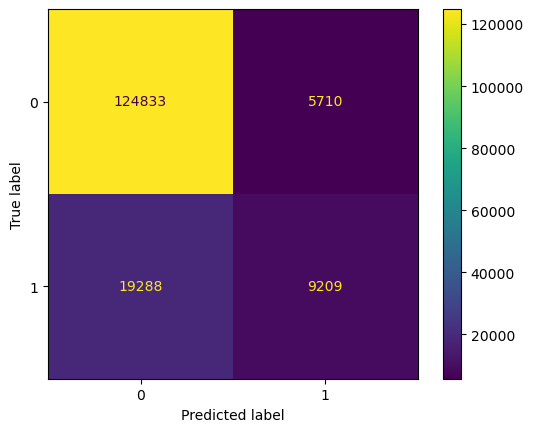



Confusion matrix for the test set
[[31190  1452]
 [ 4823  2296]]


C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


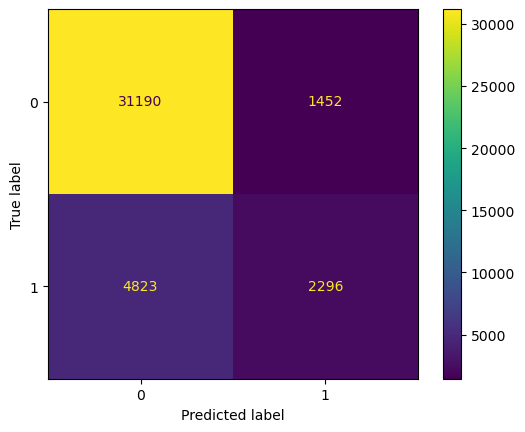

In [39]:
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Features Importances

In [33]:
def plot_feature_importances(model, X_train):
    # Get absolute value of coefficients
    coefs = np.abs(model.coef_)
    
    # Normalize coefficients
    coefs /= np.sum(coefs)
    
    # Sort coefficients by importance
    sorted_idx = np.argsort(coefs)
    
    # Get feature names
    feature_names = X_train.columns.values
    
    plt.figure(figsize=(8, 5))
    # Plot horizontal bar chart of feature importances
    plt.barh(range(len(sorted_idx)), coefs[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
    # set the tick label font size and other parameters
    plt.tick_params(axis='both', which='major', labelsize=6, length=6, width=2, direction='out', pad=8)

    plt.xlabel('Normalized Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()

In [34]:
## plot linear regression feature importances
plot_feature_importances(log_model, X_train_mod)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [40]:
def report_coef_train(model, feature_names):
    coef = pd.DataFrame(model.coef_.T, columns=['Coefficient'], index=feature_names)
    intercept = pd.DataFrame([model.intercept_], columns=['Intercept'], index=[''])
    return pd.concat([coef, intercept])

report_coef_train(log_model, X_train.columns)

,Coefficient,Intercept
Age Group_CHILD,-0.921752,NaN
Sexual Orientation_STRAIGHT,0.034309,NaN
Sexual Orientation_UNKNOWN,0.054835,NaN
Race_MULTI-RACIAL,-0.041789,NaN
Race_OTHER,-0.165593,NaN
...,...,...
Smoke(d)_UNKNOWN,0.174569,NaN
Smoke(d)_YES,0.570000,NaN
Cannabis use_UNKNOWN,0.059213,NaN
Cannabis use_YES,0.431361,NaN


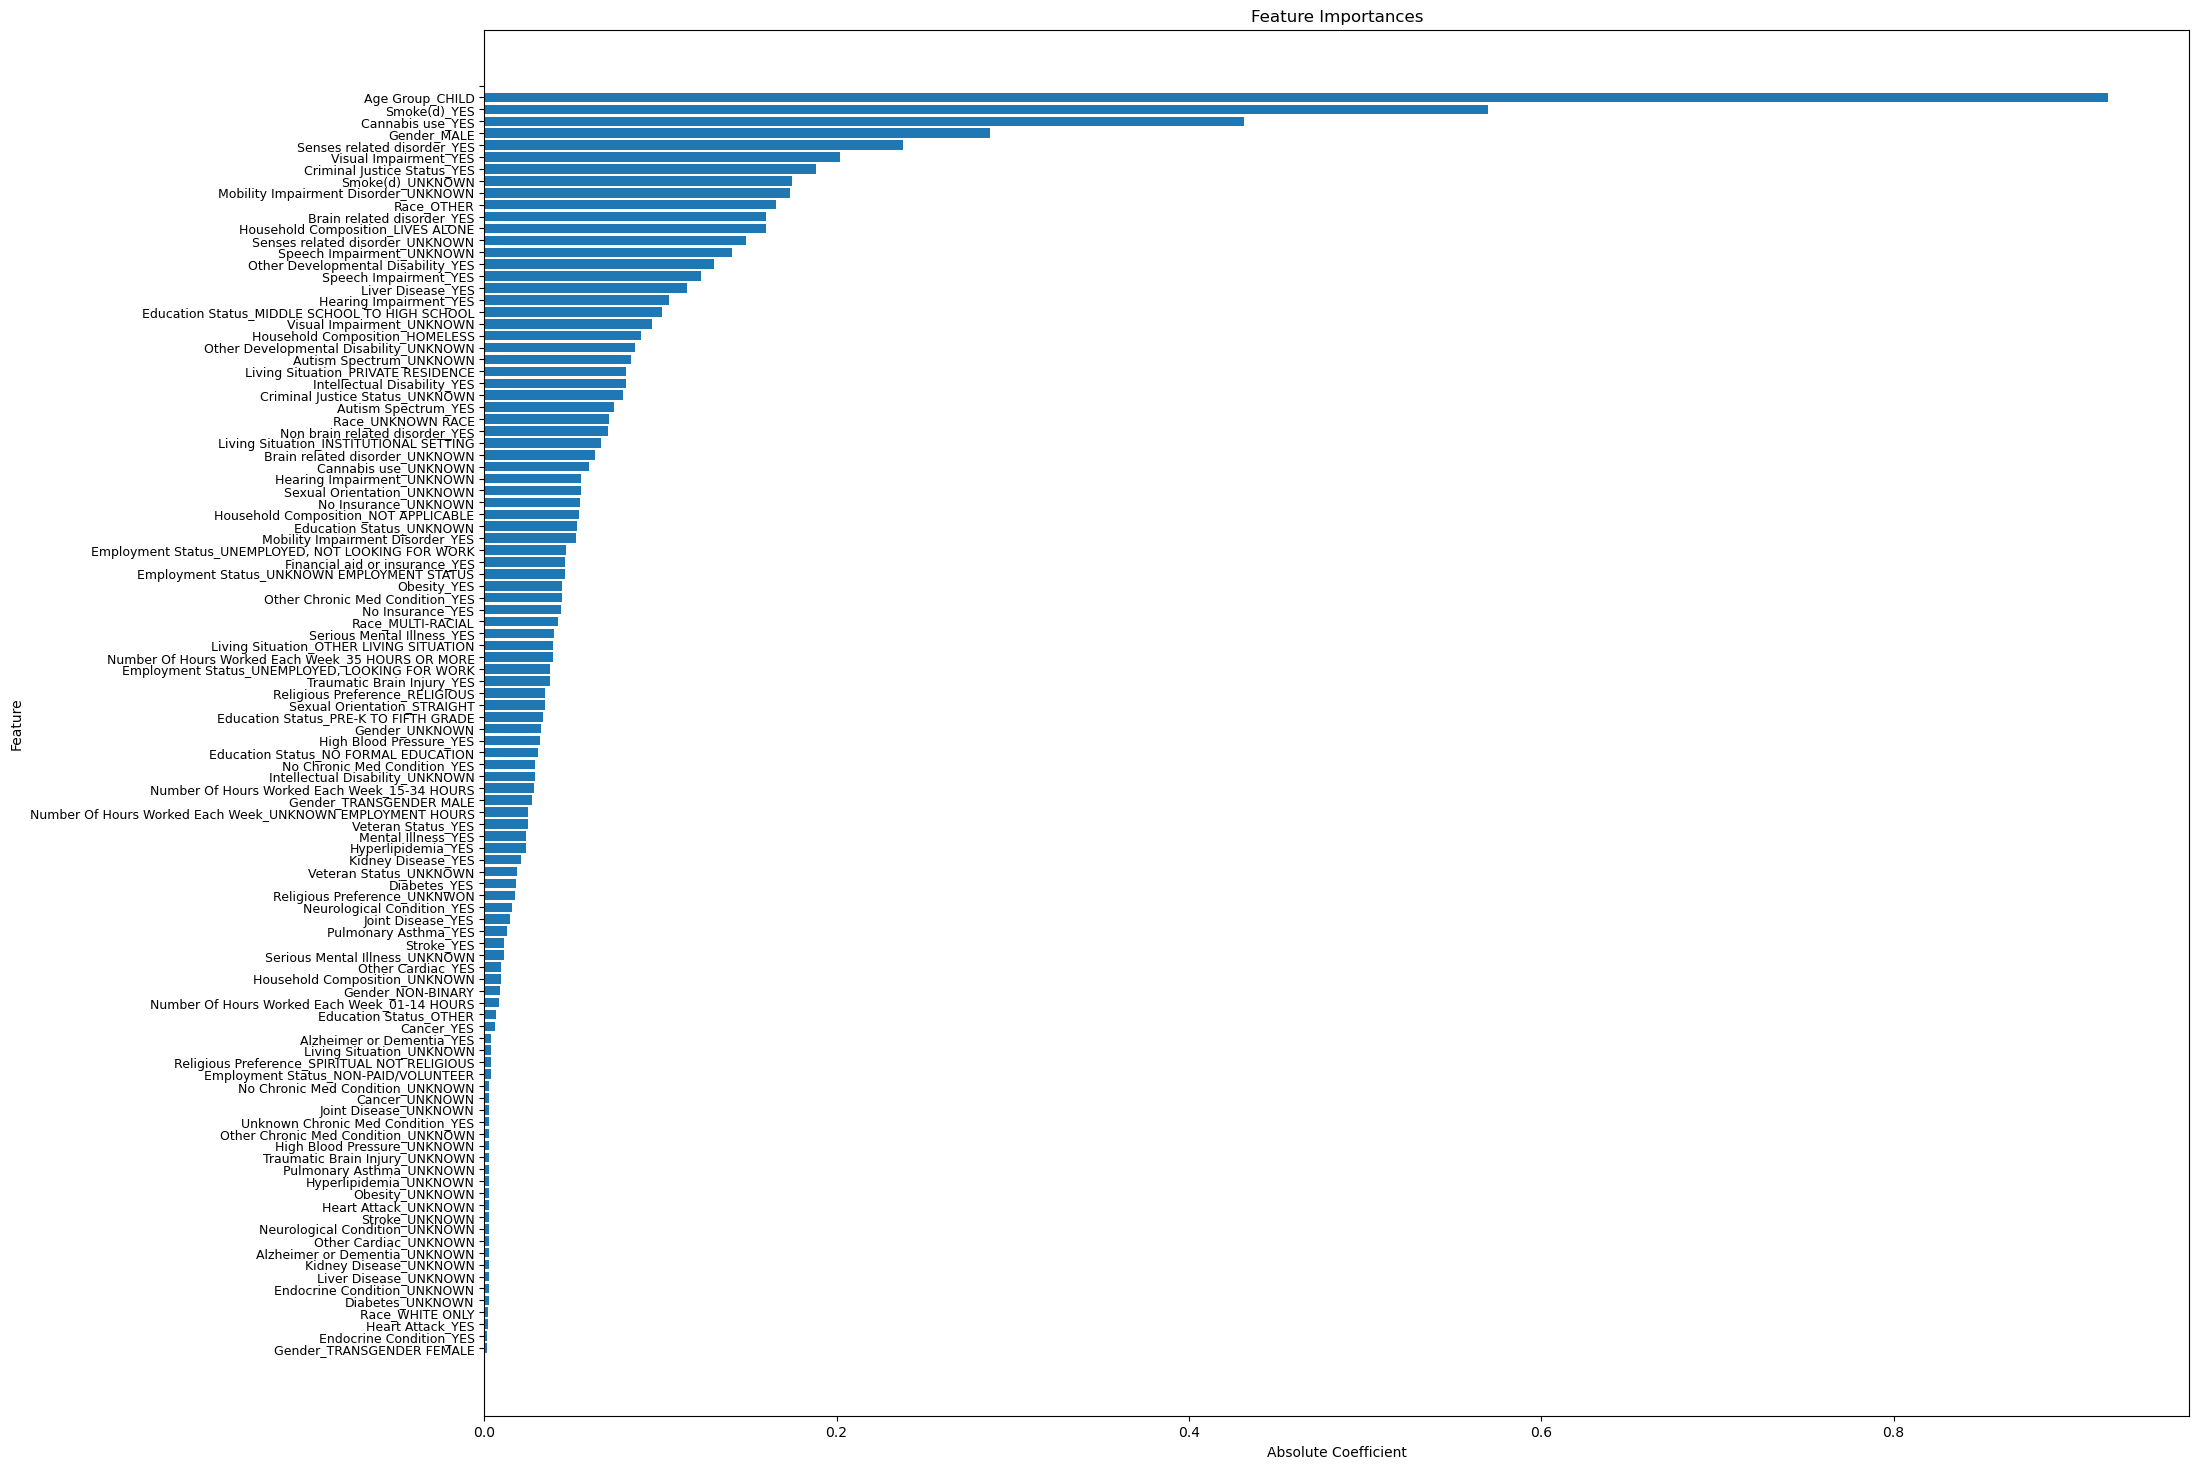

In [43]:
import matplotlib.pyplot as plt

# Get coefficients
coefs = report_coef_train(log_model, X_train.columns)['Coefficient']
# Get sorted indices
sorted_idx = abs(coefs).sort_values().index
# Plot horizontal bar chart of feature importances
plt.figure(figsize=(22, 18))
plt.barh(range(len(sorted_idx)), abs(coefs[sorted_idx]), align='center')
plt.yticks(range(len(sorted_idx)), sorted_idx, fontsize=9)
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

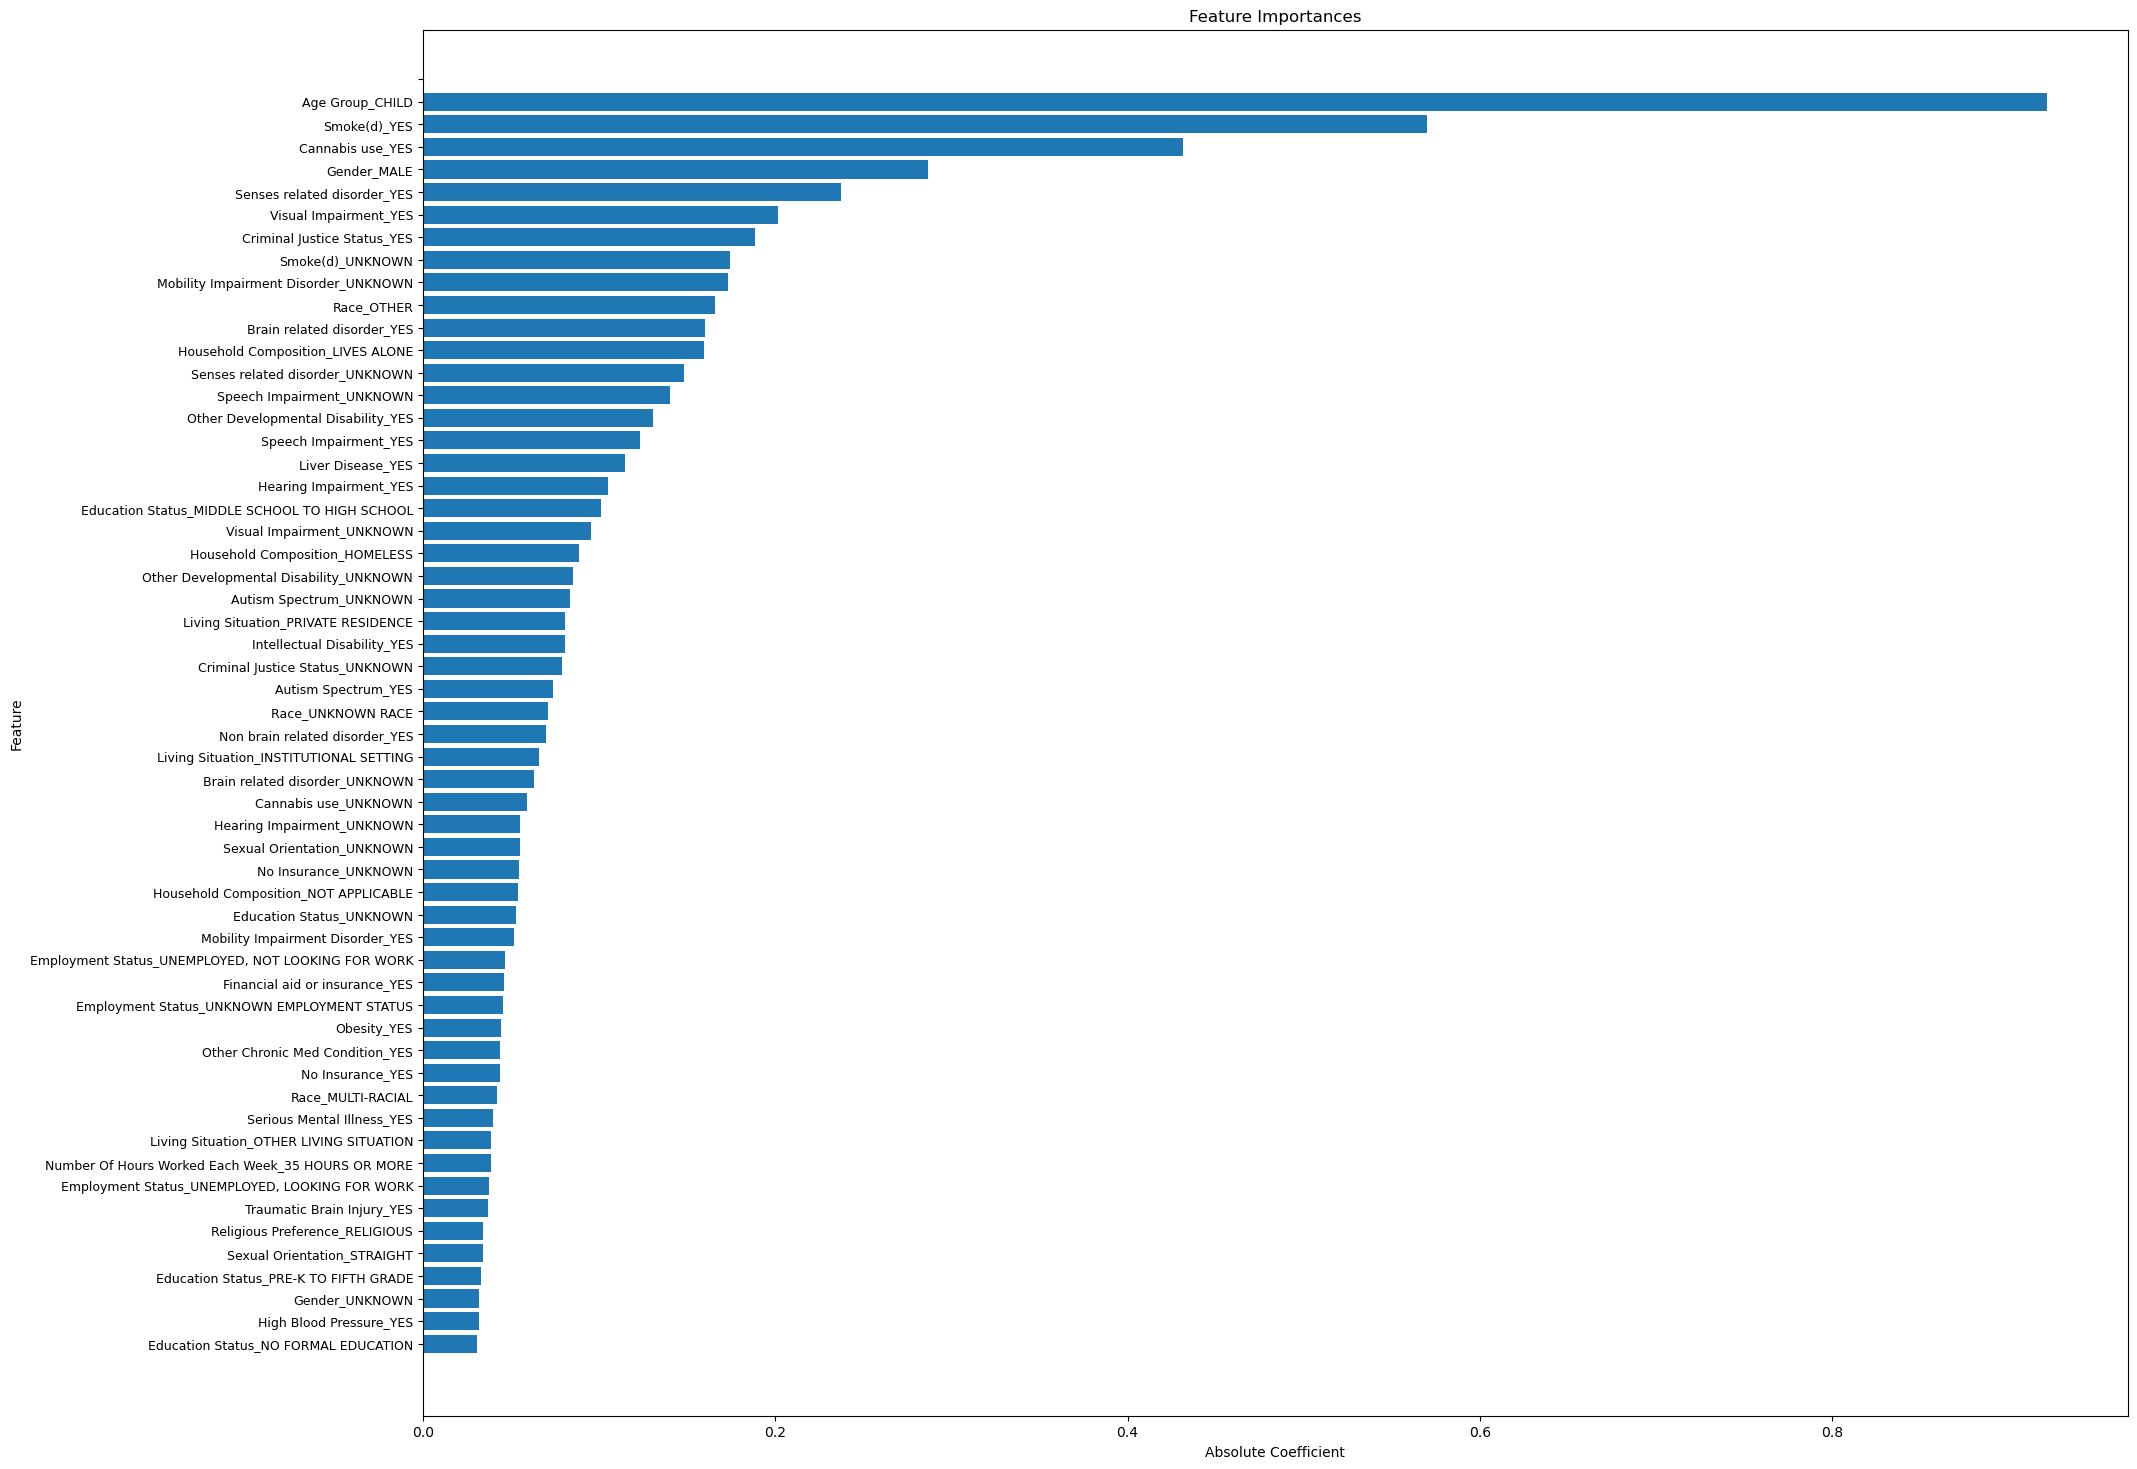

In [55]:
top_features = sorted_idx[50:]

# Plot horizontal bar chart of feature importances
plt.figure(figsize=(22, 18))
plt.barh(range(len(top_features)), abs(coefs[top_features]), align='center')
plt.yticks(range(len(top_features)), top_features, fontsize=9)
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()



In [56]:
top_features = sorted_idx[50:]

In [57]:
lst = list(top_features)
lst

['Education Status_NO FORMAL EDUCATION',
 'High Blood Pressure_YES',
 'Gender_UNKNOWN',
 'Education Status_PRE-K TO FIFTH GRADE',
 'Sexual Orientation_STRAIGHT',
 'Religious Preference_RELIGIOUS',
 'Traumatic Brain Injury_YES',
 'Employment Status_UNEMPLOYED, LOOKING FOR WORK',
 'Number Of Hours Worked Each Week_35 HOURS OR MORE',
 'Living Situation_OTHER LIVING SITUATION',
 'Serious Mental Illness_YES',
 'Race_MULTI-RACIAL',
 'No Insurance_YES',
 'Other Chronic Med Condition_YES',
 'Obesity_YES',
 'Employment Status_UNKNOWN EMPLOYMENT STATUS',
 'Financial aid or insurance_YES',
 'Employment Status_UNEMPLOYED, NOT LOOKING FOR WORK',
 'Mobility Impairment Disorder_YES',
 'Education Status_UNKNOWN',
 'Household Composition_NOT APPLICABLE',
 'No Insurance_UNKNOWN',
 'Sexual Orientation_UNKNOWN',
 'Hearing Impairment_UNKNOWN',
 'Cannabis use_UNKNOWN',
 'Brain related disorder_UNKNOWN',
 'Living Situation_INSTITUTIONAL SETTING',
 'Non brain related disorder_YES',
 'Race_UNKNOWN RACE',
 'Aut

In [58]:
# Create a new list to store the cleaned names
unique_names = set()
cleaned_list = []

# Loop through each name in the original list and remove the "_UNKNOWN" suffix from the name
for name in lst:
    parts = name.split("_")
    name = parts[0]
    if name not in unique_names:
        unique_names.add(name)
        cleaned_list.append(name)

# Print the cleaned list
print(cleaned_list)
len(cleaned_list)

['Education Status', 'High Blood Pressure', 'Gender', 'Sexual Orientation', 'Religious Preference', 'Traumatic Brain Injury', 'Employment Status', 'Number Of Hours Worked Each Week', 'Living Situation', 'Serious Mental Illness', 'Race', 'No Insurance', 'Other Chronic Med Condition', 'Obesity', 'Financial aid or insurance', 'Mobility Impairment Disorder', 'Household Composition', 'Hearing Impairment', 'Cannabis use', 'Brain related disorder', 'Non brain related disorder', 'Autism Spectrum', 'Criminal Justice Status', 'Intellectual Disability', 'Other Developmental Disability', 'Visual Impairment', 'Liver Disease', 'Speech Impairment', 'Senses related disorder', 'Smoke(d)', 'Age Group', '']


32

### Feature Selection using RFE 

In [54]:
from sklearn.feature_selection import RFE

# Feature selection with RFE

rfe = RFE(log_model, n_features_to_select=8) #in order to select the 5 we can run the R2 obtained we different number of features and then select the elbow
rfe.fit(X_train, y_train)

# Print the selected features and their ranking
print("Selected Features:")
for i in range(len(rfe.support_)):
    if rfe.support_[i]:
        print(X.columns[i])
        
print("Feature Ranking:")
print(rfe.ranking_)

C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rachad\anaconda3\envs\da\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Selected Features:
Age Group
Employment Status


IndexError: index 47 is out of bounds for axis 0 with size 47